# Cleaning and Analyzing Employee Exit Surveys

In this project, we will work with exit surveys from employees of the Department of Education Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

In this project, we will help our stakeholders answers the following questions:
1) Are employees who only worked for the insitutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2) Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

The stakeholders want us to combine the results from both surveys to answer these questions. Although both used the same survey template, one of them customized some of the answers.

In [1629]:
import pandas as pd

In [1630]:
import numpy as np

In [1631]:
#read in files
dete_survey = pd.read_csv('dete_survey.csv')

In [1632]:
tafe_survey = pd.read_csv('tafe_survey.csv')

In [1633]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [1634]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [1635]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [1636]:
dete_survey['Cease Date'].value_counts()

2012          344
2013          200
01/2014        43
12/2013        40
09/2013        34
Not Stated     34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
07/2014         2
02/2014         2
04/2014         2
08/2012         2
04/2013         2
07/2012         1
2014            1
07/2006         1
11/2012         1
2010            1
09/2010         1
09/2014         1
Name: Cease Date, dtype: int64

In [1637]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [1638]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [1639]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

We can see that both dataframes have null values in multiple columns. The DETE Survey has 822 rows and 56 columns. The TAFE Survey has 702 rows and 72 columns. Additionally, we can see that the TAFE Survey dataframe has the survey questions as the column names. This means the column names in each dataframe are different.

We can also see that the DETE Survey dataframe has 'Not Stated' values that indicate values are missing, but they aren't represented as NaN. 

Lastly, there are repetitive columns and also columns that are not needed.

In [1640]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

In [1641]:
dete_survey.columns[28:49]

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')

In [1642]:
dete_survey_updated = dete_survey.drop(labels = ['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'], axis = 1)

In [1643]:
tafe_survey.columns[17:66]

Index(['Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%',
       'InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had',
       'InstituteViews. Topic:6. The organisation recognised when staff did good work',
       'InstituteViews. Topic:7. Management was generally supportive of me',
       'InstituteViews. Topic:8. Management was generally supportive of my team',
       'InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me',
       'InstituteViews. Topic:10. Staff morale was positive w

In [1644]:
tafe_survey_updated = tafe_survey.drop(labels = ['Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%',
       'InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had',
       'InstituteViews. Topic:6. The organisation recognised when staff did good work',
       'InstituteViews. Topic:7. Management was generally supportive of me',
       'InstituteViews. Topic:8. Management was generally supportive of my team',
       'InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me',
       'InstituteViews. Topic:10. Staff morale was positive within the Institute',
       'InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly',
       'InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently',
       'InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly',
       'WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit',
       'WorkUnitViews. Topic:15. I worked well with my colleagues',
       'WorkUnitViews. Topic:16. My job was challenging and interesting',
       'WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work',
       'WorkUnitViews. Topic:18. I had sufficient contact with other people in my job',
       'WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job',
       'WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job',
       'WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT]',
       'WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job',
       'WorkUnitViews. Topic:23. My job provided sufficient variety',
       'WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job',
       'WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction',
       'WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance',
       'WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area',
       'WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date',
       'WorkUnitViews. Topic:29. There was adequate communication between staff in my unit',
       'WorkUnitViews. Topic:30. Staff morale was positive within my work unit',
       'Induction. Did you undertake Workplace Induction?',
       'InductionInfo. Topic:Did you undertake a Corporate Induction?',
       'InductionInfo. Topic:Did you undertake a Institute Induction?',
       'InductionInfo. Topic: Did you undertake Team Induction?',
       'InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?',
       'InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?',
       'InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?',
       'InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?',
       'InductionInfo. On-line Topic:Did you undertake a Institute Induction?',
       'InductionInfo. Induction Manual Topic:Did you undertake a Institute Induction?',
       'InductionInfo. Face to Face Topic: Did you undertake Team Induction; Category?',
       'InductionInfo. On-line Topic: Did you undertake Team Induction?process you undertook and how it was conducted.]',
       'InductionInfo. Induction Manual Topic: Did you undertake Team Induction?',
       'Workplace. Topic:Did you and your Manager develop a Performance and Professional Development Plan (PPDP)?',
       'Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?',
       'Workplace. Topic:Does your workplace promote and practice the principles of employment equity?',
       'Workplace. Topic:Does your workplace value the diversity of its employees?',
       'Workplace. Topic:Would you recommend the Institute as an employer to others?'], axis = 1)

In [1645]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [1646]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

First, we read the dete_survey.csv file into pandas again, but this time reading the 'Not Stated' values in as NaN. Second, we dropped columns 28 - 48 of the DETE Survey Dataframe and columns 17 - 65 of the TAFE Survey Dataframe. This allowed us to remove columns that we won't use in our analysis to make the dataframes easier to work with.

In [1647]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(' ','_').str.strip()

In [1648]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   822 non-null    int64  
 1   separationtype                       822 non-null    object 
 2   cease_date                           788 non-null    object 
 3   dete_start_date                      749 non-null    float64
 4   role_start_date                      724 non-null    float64
 5   position                             817 non-null    object 
 6   classification                       455 non-null    object 
 7   region                               717 non-null    object 
 8   business_unit                        126 non-null    object 
 9   employment_status                    817 non-null    object 
 10  career_move_to_public_sector         822 non-null    bool   
 11  career_move_to_private_sector   

In [1649]:
mapping = {'Record ID': 'id', 'CESSATION YEAR':'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender.What is your Gender?':'gender','CurrentAge.Current Age': 'age', 'Employment Type. Employment Type': 'employment_status','Classification. Classification': 'position','LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service','LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

In [1650]:
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis = 1)

In [1651]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [1652]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Above, we renamed the columns in both the dete_survey_updated and tafe_survey_updated dataframe. In the former, we made all the capitalization lowercase, removed trailing white space, and replaced spaces with underscores. In the latter, we renamed nine of the columns using a mapping dictionary.

We are trying to answer the following question: Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In [1653]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [1654]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [1655]:
dete_resignations = dete_survey_updated.copy()[(dete_survey_updated['separationtype'] == 'Resignation-Other reasons') | (dete_survey_updated['separationtype'] == 'Resignation-Other employer') | (dete_survey_updated['separationtype'] == 'Resignation-Move overseas/interstate')]

In [1656]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [1657]:
tafe_resignations = tafe_survey_updated.copy()[tafe_survey_updated['separationtype'] == 'Resignation']

In [1658]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


Above, we created two new dataframes from the dete_survey_updated and tafe_survey_updated dataframes that only contain the rows where the separationtype column values are some variant of 'Resignation'

In [1659]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
07/2012      1
2010         1
09/2010      1
Name: cease_date, dtype: int64

In [1660]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [1661]:
#Extract the year from cease_date column
pattern = r"(?P<Year>[1-2][0-9]{3})"
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]

In [1662]:
dete_resignations['cease_date'].value_counts()
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)

In [1663]:
dete_resignations['cease_date'].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [1664]:
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [1665]:
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

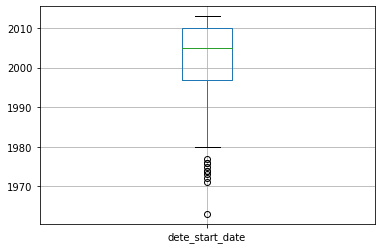

In [1666]:
dete_resignations.boxplot(column = 'dete_start_date')

In [1667]:
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [1668]:
dete_resignations.drop(dete_resignations[dete_resignations['dete_start_date'] < 1980].index, inplace = True)

In [1669]:
dete_resignations['dete_start_date'].value_counts().sort_index()

1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In the code above, we cleaned the cease_date column in dete_resignations by extracting the year. Additionally, we then inspected the values in cease_date and dete_start_date columns in dete_resignations and the cease_date column in tafe_resignations. Since the dete_start_date column had values dating back to 1963, we plotted a boxplot to see what the distribution is. We could see that values less than 1980 fell outside the distribution. Therefore, we dropped all values older than 1980.

# Create a New Column

In [1670]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

We created a new column called institute_service as a matching counterpart to the service column in the tafe_resignations. This column calculcates the length of time an employee was at the company. 

# Identify Dissatisfied Employees

In [1671]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [1672]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [1673]:
#write a function to apply df.any() method

In [1674]:
def update_vals(input):
    if pd.isnull(input):
        return np.nan
    elif input == '-':
        return False
    else:
        return True

In [1675]:
#Apply update_vals function to the two respective columns. This will transform the values

In [1676]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [1677]:
#Use Df.any() function to create a new column 'dissatisfied' deriving True, False, NaN values from across all respective columns

In [1678]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(func = update_vals).any(axis = 1, skipna = False)

In [1679]:
tafe_resignations['dissatisfied'].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

In [1680]:
#repeat same process for dete_resignations dataframe

In [1681]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition','lack_of_job_security','work_location','employment_conditions','work_life_balance', 'workload']].applymap(func = update_vals).any(axis = 1, skipna = False)

In [1682]:
dete_resignations['dissatisfied'].value_counts()

True    301
Name: dissatisfied, dtype: int64

In [1683]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

In the code above, we wrote a function named update_vals that makes changes to the values in defined columns, returning values of True, False, NaN. We used the applymap() method to apply this function to the columns we wanted. Then, we used the df.any() method to create a new column in each dataframe that checks if any value across all respective columns are True to then return True, False, or NaN. 

# Combine the Data

In [1684]:
#create a column in each dataframe that allows us to distinguish between the two when combined

In [1685]:
dete_resignations_up['institute'] = 'DETE'

In [1686]:
dete_resignations_up['institute'].value_counts()

DETE    301
Name: institute, dtype: int64

In [1687]:
tafe_resignations_up['institute'] = 'TAFE'

In [1688]:
tafe_resignations_up['institute'].value_counts()

TAFE    340
Name: institute, dtype: int64

In [1689]:
#combine the dataframes

In [1690]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)

In [1691]:
#drop columns with less than 500 non null values

In [1692]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 55 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   641 non-null    float64
 1   separationtype                                       641 non-null    object 
 2   cease_date                                           625 non-null    float64
 3   dete_start_date                                      273 non-null    float64
 4   role_start_date                                      261 non-null    float64
 5   position                                             589 non-null    object 
 6   classification                                       154 non-null    object 
 7   region                                               255 non-null    object 
 8   business_unit                                        32 non-null     o

In [1693]:
combined = combined.dropna(thresh = 500, axis = 1)

In [1694]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 641 non-null    float64
 1   separationtype     641 non-null    object 
 2   cease_date         625 non-null    float64
 3   position           589 non-null    object 
 4   employment_status  587 non-null    object 
 5   institute_service  553 non-null    object 
 6   dissatisfied       633 non-null    object 
 7   institute          641 non-null    object 
dtypes: float64(2), object(6)
memory usage: 40.2+ KB


In the code above, we created a new column with the appropriate institute name, so we can distinguish between results when we combine the dataframes. Then, we combined the dataframes, choosing to ignore the existing indices. Last, we dropped any columns with less than 500 non null values

# Clean the Service Column

In [1695]:
combined['institute_service'] = combined['institute_service'].astype(str)

In [1696]:
combined['institute_service'].value_counts(dropna = False)

nan                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
12.0                   6
14.0                   6
17.0                   6
22.0                   6
10.0                   6
16.0                   5
18.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
21.0                   3
26.0                   2
28.0                   2
25.0                   2
30.0                   2
29.0                   1
34.0                   1


In [1697]:
combined['institute_service'] = combined['institute_service'].str.extract(r'(\d+)')
combined['institute_service'] = combined['institute_service'].astype(float)

In [1698]:
combined['institute_service'].value_counts(dropna = False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
6.0      17
20.0     17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
12.0      6
10.0      6
14.0      6
22.0      6
17.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
19.0      3
32.0      3
25.0      2
28.0      2
30.0      2
26.0      2
27.0      1
33.0      1
29.0      1
34.0      1
31.0      1
Name: institute_service, dtype: int64

In [1699]:
def career_stage(input):
    if pd.isnull(input):
        return np.nan
    elif input < 3:
        return 'New'
    elif input > 3 and input < 7:
        return 'Experienced'
    elif 7 < input < 11:
        return 'Established'
    elif input >= 11:
        return 'Veteran'

In [1700]:
combined['service_cat'] = combined['institute_service'].apply(func = career_stage)

In [1701]:
combined['service_cat'].value_counts(dropna = False)

NaN            205
New            193
Veteran        126
Experienced     89
Established     28
Name: service_cat, dtype: int64

In the code above, we first extracted the years of service in the institute_service column. We dd this via an extract method. Second, we mapped the values to one of the career stages. 
New: Less than 3 years at a company
Experienced: 3-6 years at a company
Established: 7-10 years at a company
Veteran: 11 or more years at a company

# Perform Initial Analysis

In [1702]:
combined['dissatisfied'].value_counts(dropna = False)

True     392
False    241
NaN        8
Name: dissatisfied, dtype: int64

In [1703]:
combined['dissatisfied'] = combined['dissatisfied'].fillna(True)

In [1704]:
combined['dissatisfied'].value_counts(dropna = False)

True     400
False    241
Name: dissatisfied, dtype: int64

In [1705]:
combined_pvt = combined.pivot_table(index = 'service_cat', values = 'dissatisfied')
combined_pvt

,dissatisfied
service_cat,
Established,1.000000
Experienced,0.730337
New,0.476684
Veteran,0.793651


In [1706]:
%matplotlib inline

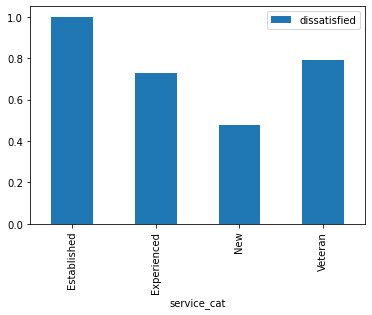

In [1707]:
combined_pvt.plot(kind = 'bar')

After creating a pivot table and a plot to represent it, we can see that the majority of dissatisfied employees were in the 'established' career stage, with 7-10 years of service at the institute. This is a tentative conclusion, as we would need to handle the rest of the missing data to finalize our analysis.